In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('datasets/Admission_Predict.csv')
df.shape

(400, 9)

In [3]:
# view top 5 rows
df.head().T

,0,1,2,3,4
Serial No.,1.00,2.00,3.00,4.00,5.00
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


In [4]:
# renaming feature
df = df.rename(columns={'Chance of Admit ':'Chance of Admit', 'LOR ': 'LOR'})

The column name `Chance of Admit` and `LOR` had a space at the end

In [5]:
# check features info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


There are no missing values

In [6]:
# view statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
# dropping redundant feature
df.drop('Serial No.', axis=1, inplace=True)
df.shape

(400, 8)

### Outlier Treatment

In [8]:
# importing required packages
from collections import Counter

In [9]:
# helper function to detect outliers
def check_for_outliers(df, features, no_of_outliers=2):
    outlier_indices = []
    for feature in features:
        # compute interquartile range (IQR)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # determine a list of indices of outliers for feature
        outliers_list = df[(df[feature] < Q1 - outlier_step) | 
                           (df[feature] > Q3 + outlier_step )].index
        
        # append the found outlier to list of outlier indices
        outlier_indices.extend(outliers_list)
        
    print(f'select observations containing more than {no_of_outliers} outliers')
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > no_of_outliers)
    
    return multiple_outliers

In [10]:
# get outlier indecies to drop
outliers_to_drop = check_for_outliers(df, df.columns.tolist())
outliers_to_drop

select observations containing more than 2 outliers


[]

### EDA

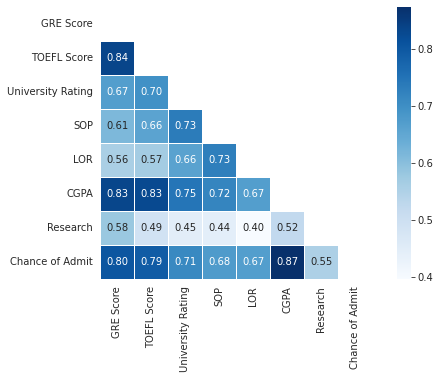

In [11]:
# plotting correlation heatmap
data = df.copy()
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    figure, ax = plt.subplots(figsize=(9,5))
    ax = sns.heatmap(data.corr(), mask=mask, square=True, annot=True, 
                     fmt='0.2f', linewidths=.8, cmap='Blues')

`Chance of Admit` is highly correlated with `CGPA`. `GRE` and `TOEFL` scores are also correlated.

In [12]:
# get numerical features
numerical_features = df.describe().columns
numerical_features

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
# check features value counts
data = df.copy()
for feature in ['University Rating', 'SOP', 'LOR', 'Research']:
    print(data[feature].value_counts())
    print('*'*50, end='\n')

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64
**************************************************
4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64
**************************************************
3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64
**************************************************
1    219
0    181
Name: Research, dtype: int64
**************************************************


Features like `University Rating`, `SOP`, `LOR` and `Research` are categorical in nature.

In [14]:
# helper function to plot distribution plot
def plot_dist_plot(features, no_of_rows=2, no_of_columns=2):
    fig = plt.figure(figsize=(12,10))
    grid = plt.GridSpec(no_of_rows, no_of_columns, wspace=.25, hspace=.25)
    for index in range(no_of_rows*no_of_columns):
        exec(f"plt.subplot(grid{[index]})")
        sns.distplot(df[features[index]], kde=True, color='b', rug=True)
        plt.title(f'Distribution of {features[index]}')
        plt.tight_layout()

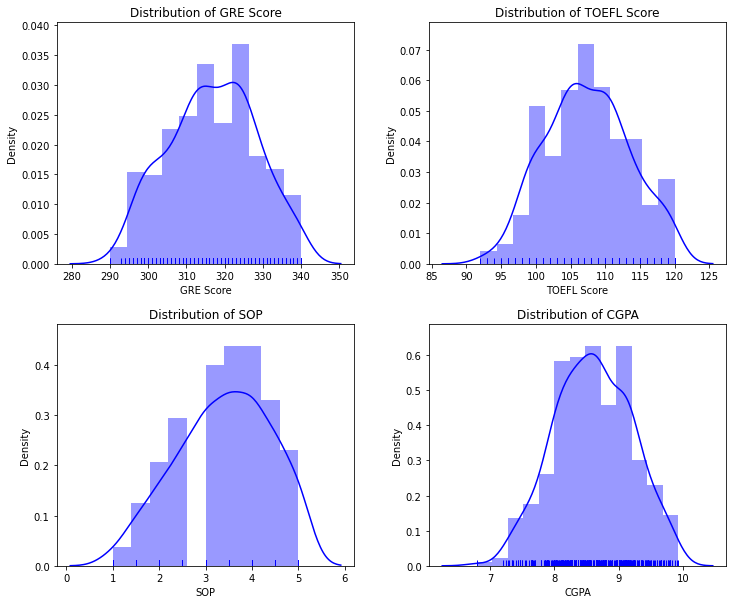

In [15]:
# view data distributions
plot_dist_plot(['GRE Score', 'TOEFL Score', 'SOP', 'CGPA'])

It is clear from the distributions, students with varied merit apply for the university.

In [16]:
# analyse GRE score
gre_score = df.groupby(['University Rating']).agg({'GRE Score': ['mean']})
gre_score.reset_index()

,University Rating,GRE Score
,,mean
0,1,303.153846
1,2,309.177570
2,3,315.954887
3,4,324.824324
4,5,328.333333


As we can see mean GRE score increases as the university rating increases.

In [17]:
# analyse TOEFL score
toefl_score = df.groupby(['University Rating']).agg({'TOEFL Score': ['mean']})
toefl_score.reset_index()

,University Rating,TOEFL Score
,,mean
0,1,99.076923
1,2,103.523364
2,3,106.887218
3,4,111.824324
4,5,113.666667


In [18]:
# analyse TOEFL score
student_cgpa = df.groupby(['University Rating']).agg({'CGPA': ['mean']})
student_cgpa.reset_index()

,University Rating,CGPA
,,mean
0,1,7.745769
1,2,8.183738
2,3,8.552256
3,4,9.021622
4,5,9.291167


Similar trend shown for features `TOEFL Score` and `CGPA`.

In [19]:
# helper function to perform univariate analysis
def perform_univariate_analysis(data, feature):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
    sns.boxplot(data=data, x=feature, ax=ax_box)
    sns.histplot(data=data, x=feature, ax=ax_hist, kde=True)
    ax_box.set(xlabel='')
    plt.show()

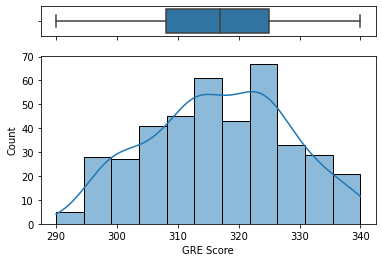

In [20]:
# analyse GRE Score
perform_univariate_analysis(df, 'GRE Score')

* Average GRE score is around 318
* 25% of scores are less than 309
* 75% of scores are less than 325

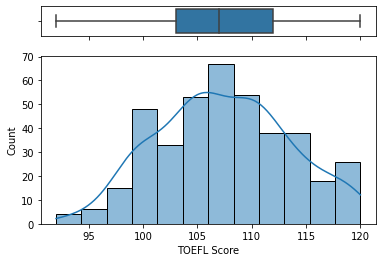

In [21]:
# analyse TOEFL Score
perform_univariate_analysis(df, 'TOEFL Score')

* Average TOEFL score is around 107
* 25% of scores are less than 104
* 75% of scores are less than 112

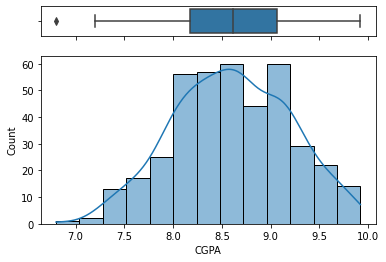

In [22]:
# analyse CGPA
perform_univariate_analysis(df, 'CGPA')

* Average CGPA is around 8.6
* 25% of CGPA are less than 8.1
* 75% of CGPA are less than 9.1

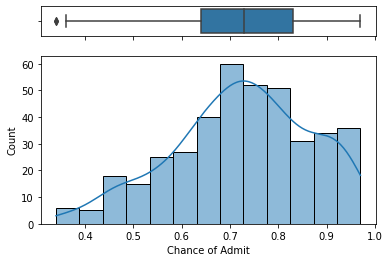

In [23]:
# analyse Chance of Admit
perform_univariate_analysis(df, 'Chance of Admit')

* Average Chance of Admit is around 0.73
* 25% of Chance of Admit are less than 0.65
* 75% of Chance of Admit are less than 0.83

In [24]:
def perform_bivariate_analysis(x_feature, plot_type='box', y_feature='Chance of Admit', 
                               hue='Research', enable_hue=False):
    if plot_type == 'box':
        sns.boxplot(x=x_feature, y=y_feature, data=df)
    if plot_type == 'scatter':
        sns.scatterplot(x=x_feature, y=y_feature, data=df, hue=hue)
    if plot_type == 'regplot':
        sns.regplot(x=x_feature, y=y_feature, data=df)
    if plot_type == 'lmplot':
        sns.lmplot(x=x_feature, y=y_feature, data=df, hue=hue)
    plt.title(f'{x_feature} vs {y_feature}')
    plt.show()

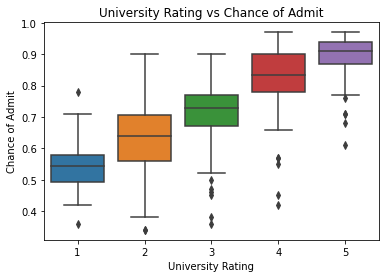

In [25]:
perform_bivariate_analysis('University Rating')

As we can see average chance of admit increases as university rating increases.

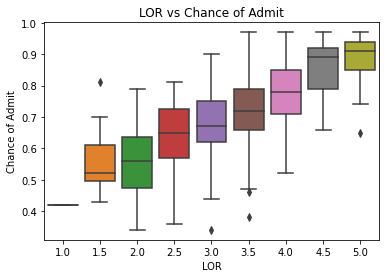

In [26]:
perform_bivariate_analysis('LOR')

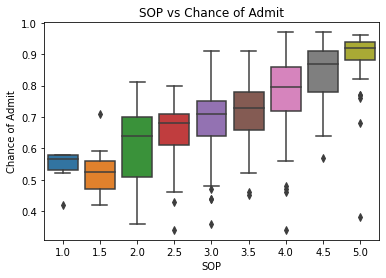

In [27]:
perform_bivariate_analysis('SOP')

Similar treands are observed for features `LOR` and `SOP`.

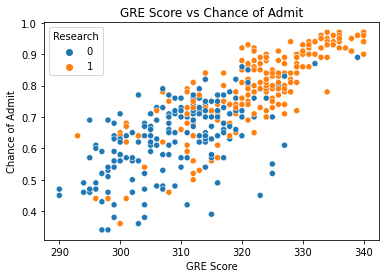

In [28]:
perform_bivariate_analysis('GRE Score', plot_type='scatter')

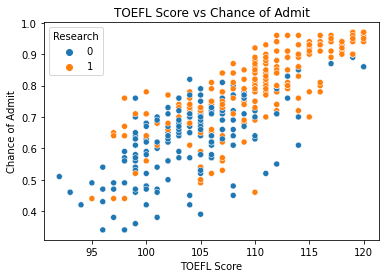

In [29]:
perform_bivariate_analysis('TOEFL Score', plot_type='scatter')

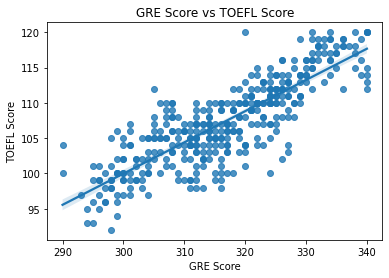

In [30]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='TOEFL Score', plot_type='regplot')

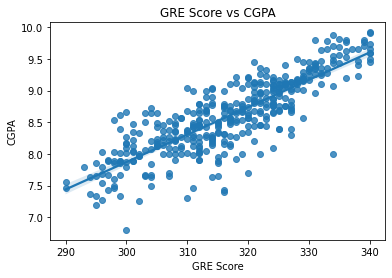

In [31]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='CGPA', plot_type='regplot')

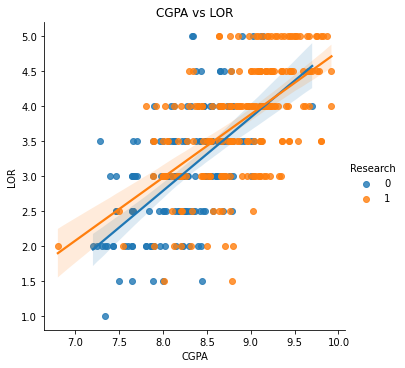

In [32]:
perform_bivariate_analysis(x_feature='CGPA', y_feature='LOR', plot_type='lmplot')

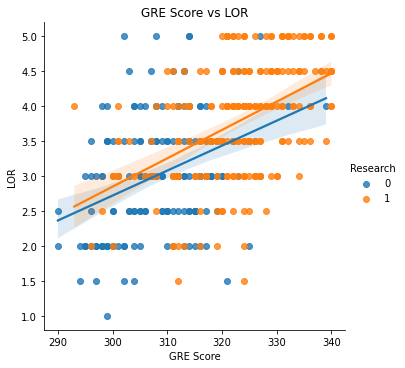

In [33]:
perform_bivariate_analysis(x_feature='GRE Score', y_feature='LOR', plot_type='lmplot')

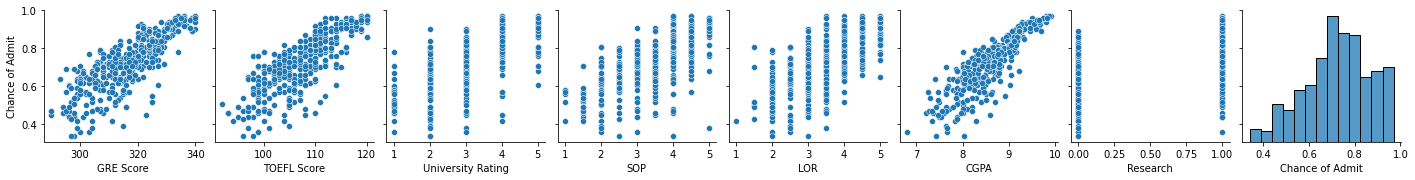

In [34]:
# checking relationship of target variable with independent variables
sns.pairplot(df, y_vars=['Chance of Admit'])
plt.show()